# Get acces to Google cloud

In [1]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/1AX4XfWjqH3V-Q8c7rKuU86aIltEfW3SVWxIXy26WtnyqsseJoA_KpMDbW0g

Successfully saved authorization token.


In [2]:
!gcloud auth login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=ORX72bP04Mpv8kRnr4wE68gccuVhUn&access_type=offline&code_challenge=BBDPL9TMPJYtJTnPC0cRkXUS0S7SYY5TY4iEzkMNU-k&code_challenge_method=S256


You are now logged in as [a01020270@tec.mx].
Your current project is [tesina-347700].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


Updates are available for some Google Cloud CLI components.  To install them,
please run:
  $ gcloud components update



In [3]:
!gcloud config set project tesina-347700 

Updated property [core/project].


In [4]:
SERVICE_ACCOUNT='daniel-atilano@tesina-347700.iam.gserviceaccount.com'
KEY = 'client_secret_810113486912-g66kohnvh3c10pl70r2p5ks9gn0pgdbo.apps.googleusercontent.com.json'
!gcloud iam service-accounts keys create {KEY} --iam-account {SERVICE_ACCOUNT}

created key [bf93d42ed7a098a87b119a340ca7d22f6d8bd2b2] of type [json] as [client_secret_810113486912-g66kohnvh3c10pl70r2p5ks9gn0pgdbo.apps.googleusercontent.com.json] for [daniel-atilano@tesina-347700.iam.gserviceaccount.com]


# Test credentials

In [5]:
from google.auth.transport.requests import AuthorizedSession
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file(KEY)
scoped_credentials = credentials.with_scopes(
    ['https://www.googleapis.com/auth/cloud-platform'])

# Get images

In [44]:
import urllib

coords = [100.243, 20.364]

project = 'projects/earthengine-public'
asset_id = 'COPERNICUS/S2'
name = '{}/assets/{}'.format(project, asset_id)
url = 'https://earthengine.googleapis.com/v1alpha/{}:listImages?{}'.format(
  name, urllib.parse.urlencode({
    'startTime': '2020-04-01T00:00:00.000Z',
    'endTime': '2021-05-01T00:00:00.000Z',
    'region': '{"type":"Point", "coordinates":' + str(coords) + '}',
    'filter': 'CLOUDY_PIXEL_PERCENTAGE < 10'
}))

response = session.get(url)
content = response.content

for asset in json.loads(content)['images']:
    id = asset['id']
    cloud_cover = asset['properties']['CLOUDY_PIXEL_PERCENTAGE']
    print('%s : %s' % (id, cloud_cover))


COPERNICUS/S2/20200404T034531_20200404T035002_T47QPC : 0
COPERNICUS/S2/20200419T034529_20200419T035626_T47QPC : 0.0194
COPERNICUS/S2/20200504T034541_20200504T035005_T47QPC : 2.826
COPERNICUS/S2/20200509T034529_20200509T035650_T47QPC : 3.3806
COPERNICUS/S2/20200514T034541_20200514T035006_T47QPC : 0.147
COPERNICUS/S2/20200827T034539_20200827T040004_T47QPC : 6.7548
COPERNICUS/S2/20201011T034701_20201011T035256_T47QPC : 2.2787
COPERNICUS/S2/20201026T034839_20201026T040158_T47QPC : 0.1835
COPERNICUS/S2/20201110T035001_20201110T040221_T47QPC : 0
COPERNICUS/S2/20201115T035019_20201115T035952_T47QPC : 0.0154
COPERNICUS/S2/20201120T035051_20201120T035303_T47QPC : 1.2543
COPERNICUS/S2/20201125T035059_20201125T035102_T47QPC : 7.4898
COPERNICUS/S2/20201130T035121_20201130T035119_T47QPC : 0.56
COPERNICUS/S2/20201210T035141_20201210T040126_T47QPC : 5.2356
COPERNICUS/S2/20201215T035149_20201215T035144_T47QPC : 0.4833
COPERNICUS/S2/20201225T035149_20201225T035149_T47QPC : 1.5544
COPERNICUS/S2/20201230

In [10]:
asset_id = 'COPERNICUS/S2/20200404T034531_20200404T035002_T47QPC'
name = '{}/assets/{}'.format(project, asset_id)
url = 'https://earthengine.googleapis.com/v1alpha/{}'.format(name)

response = session.get(url)
content = response.content

asset = json.loads(content)
print('Band Names: %s' % ','.join(band['id'] for band in asset['bands']))
print('First Band: %s' % json.dumps(asset['bands'][0], indent=2, sort_keys=True))

Band Names: B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12,QA10,QA20,QA60
First Band: {
  "dataType": {
    "precision": "INT",
    "range": {
      "max": 65535
    }
  },
  "grid": {
    "affineTransform": {
      "scaleX": 60,
      "scaleY": -60,
      "translateX": 600000,
      "translateY": 2300040
    },
    "crsCode": "EPSG:32647",
    "dimensions": {
      "height": 1830,
      "width": 1830
    }
  },
  "id": "B1",
  "pyramidingPolicy": "MEAN"
}


### Display image

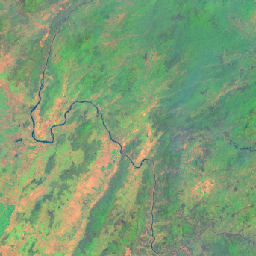

In [11]:
url = 'https://earthengine.googleapis.com/v1alpha/{}:getPixels'.format(name)
body = json.dumps({
    'fileFormat': 'PNG',
    'bandIds': ['B11', 'B8A', 'B2'],
    'region': asset['geometry'],
    'grid': {
        'dimensions': {'width': 256, 'height': 256},
    },
    'visualizationOptions': {
        'ranges': [{'min': 0, 'max': 4000}],
    },
})

image_response = session.post(url, body)
image_content = image_response.content

from IPython.display import Image
Image(image_content)


In [10]:
#function for python to display images; though geemap works far better
import folium


def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
      tiles=map_id_dict['tile_fetcher'].url_format,
      attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
      name=name,
      overlay=True,
      control=True
  ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer
#function call from main 
    #Define a map centered on San Francisco Bay.
#map_l8 = folium.Map(location=[20.8526589, -99.9760121], zoom_start=10)

    # Add the image layer to the map and display it.
#map_l8.add_ee_layer(image, image_viz_params,  'false color composite')
#display(map_l8)


In [111]:
#function to scale bands and pixels
def mask(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    
    opticalBands = image.select('B.').multiply(0.0000275).add(-0.2)
    return image.addBands(opticalBands, None, True) \
      .updateMask(qaMask) \
      .updateMask(saturationMask)


In [140]:
#Queretaro Region
aoi = ee.Geometry.Polygon(
  [[
    [99.2204, 21.5014],
    [100.4815, 20.4914],
    [98.4621, 21.1924],
    [100.0348, 19.5406]
  ]],
  None, False);

#Assemble a collection of Landsat images for a given
#region and day-of-year range.
imgCol = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA').filterBounds(aoi) \
        .filter(ee.Filter.dayOfYear(270, 90)).map(lambda img: img.set('year', ee.Image(img).date().get('year')))

#Make a distinct year collection; one image representative per year.
distinctYears = imgCol.distinct('year').sort('year');

#Define a join filter; one-to-many join on ‘year’ property.
filt = ee.Filter.equals(**{'leftField': 'year', 'rightField': 'year'})
join = ee.Join.saveAll('year_match')

joinCol = join.apply(distinctYears, imgCol, filt)

lsCompList = joinCol.map(lambda img: 
  #Set the list of images belonging to the given year.
    ee.ImageCollection.fromImages(img.get('year_match')) \
    #apply cloud mask.
    .map(mask) \
    #reduce image collection by median.
    .reduce(ee.Reducer.median())  \
    #Set composite year as an image property.
    .copyProperties(img, ['year'])
)

lsCompCol = ee.ImageCollection(lsCompList)

In [141]:
import pprint

pprint.pprint(lsCompCol.getInfo())
#the comopsition generated changes attribute names, so some api functions will not recognize them

{'bands': [],
 'features': [{'bands': [{'crs': 'EPSG:4326',
                          'crs_transform': [1, 0, 0, 0, 1, 0],
                          'data_type': {'precision': 'double',
                                        'type': 'PixelType'},
                          'id': 'B1_median'},
                         {'crs': 'EPSG:4326',
                          'crs_transform': [1, 0, 0, 0, 1, 0],
                          'data_type': {'precision': 'double',
                                        'type': 'PixelType'},
                          'id': 'B2_median'},
                         {'crs': 'EPSG:4326',
                          'crs_transform': [1, 0, 0, 0, 1, 0],
                          'data_type': {'precision': 'double',
                                        'type': 'PixelType'},
                          'id': 'B3_median'},
                         {'crs': 'EPSG:4326',
                          'crs_transform': [1, 0, 0, 0, 1, 0],
                          'data_type'

In [192]:
first = (lsCompCol.first().getInfo())
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_044034_20140318')


#pprint.pprint(image.getInfo())
pprint.pprint(first)

{'bands': [{'crs': 'EPSG:4326',
            'crs_transform': [1, 0, 0, 0, 1, 0],
            'data_type': {'precision': 'double', 'type': 'PixelType'},
            'id': 'B1_median'},
           {'crs': 'EPSG:4326',
            'crs_transform': [1, 0, 0, 0, 1, 0],
            'data_type': {'precision': 'double', 'type': 'PixelType'},
            'id': 'B2_median'},
           {'crs': 'EPSG:4326',
            'crs_transform': [1, 0, 0, 0, 1, 0],
            'data_type': {'precision': 'double', 'type': 'PixelType'},
            'id': 'B3_median'},
           {'crs': 'EPSG:4326',
            'crs_transform': [1, 0, 0, 0, 1, 0],
            'data_type': {'precision': 'double', 'type': 'PixelType'},
            'id': 'B4_median'},
           {'crs': 'EPSG:4326',
            'crs_transform': [1, 0, 0, 0, 1, 0],
            'data_type': {'precision': 'double', 'type': 'PixelType'},
            'id': 'B5_median'},
           {'crs': 'EPSG:4326',
            'crs_transform': [1, 0, 0, 0, 1, 0],

In [241]:
# Export the image, specifying the CRS, transform, and region.
# This method, however, only works with TIF files and only works for one image at a time
landsat = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_027045_20150109').select('B6', 'B5', 'B2')
#region = ee.Geometry.Rectangle(37.07, 11.50, 37.39, 11.82)
geometry = ee.Geometry.Point([20.8526589, -99.9760121])


task = ee.batch.Export.image.toDrive(**{
    'image': landsat,
    'description': 'imagetoDriveExample3',
    'folder': 'Tesina',
    'scale': 30,
    'region': geometry
    
})

task.start()

## Image test

In [248]:
!pip install unidecode
!pip install geetools

     |████████████████████████████████| 235 kB 432 kB/s eta 0:00:01
     |████████████████████████████████| 74 kB 523 kB/s eta 0:00:011
     |████████████████████████████████| 44 kB 589 kB/s eta 0:00:01
  Created wheel for geetools: filename=geetools-0.6.14-py3-none-any.whl size=92107 sha256=9392cfbb852fcfca2e92b773e77298bf3a5b0f8846b3013d8e5dbbb6da2cd690
  Stored in directory: /home/danielatilano/.cache/pip/wheels/20/4c/bf/0228d788d820ac3cf05cbaa753965eb6396b5d3fe11ed912e5
Successfully built geetools


In [7]:
bands = ['B6', 'B5', 'B2']

#Mexico Region coordinates
boundary_filter = [-117.3484375,13.266356975514793], [-85.18046875000002,13.266356975514793],\
                [-85.18046875000002,32.64372116850529], [-117.3484375,32.64372116850529] 
region = ee.Geometry.Polygon(boundary_filter)



imgcoll = ( ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA') 
              .filterDate('2015-01-01', '2020-01-01')   # Five years of data
              .filter(ee.Filter.calendarRange(9, 3, 'month'))   # Only Sep-March observations
              .filterBounds(ee.Geometry.Polygon(boundary_filter)) ) # Intersecting ROI

filtered = imgcoll.filter(ee.Filter.eq('CLOUD_COVER', 0))

# Get the number of images.
count = filtered.size()
print('Count: ', str(count.getInfo())+'\n')

Count:  346



In [8]:
filtered.first()

In [14]:
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_016049_20150112')


image_viz_params = {
    'bands': ['B6', 'B5', 'B2'],
    'min':  0,
    'max': 0.5,
    'gamma': [0.95, 1.1, 1]

}
#20,8526589 -99,9760121  Queretaro Regions

map_l8 = folium.Map(location=[20.8526589, -99.9760121], zoom_start=10)

# Add the image layer to the map and display it.
map_l8.add_ee_layer(image, image_viz_params,  'false color composite')
display(map_l8)

##  Try out geetools library

In [1]:
#https://github.com/gee-community/gee_tools

In [262]:
#name_pattern = '{sat}_{system_date}_{WRS_PATH:%d}-{WRS_ROW:%d}'
import geetools
#for band in bands:
tasks = geetools.batch.Export.imagecollection.toDrive(
    collection=filtered.select(bands), 
    folder='Tesina',
    scale= 20000,
    #namePattern= name_pattern,
    region= region)

In [263]:
bands_ = ['u-component_of_wind_height_above_ground', 'v-component_of_wind_height_above_ground']
startDate = ee.Date('2009-12-01')
endDate = ee.Date('2010-03-01')
boundary_filter_ = [39, 10, 45, 22]
region_ = ee.Geometry.Rectangle(boundary_filter_)
imgcol = ee.ImageCollection("NOAA/CFSV2/FOR6H").filterBounds(ee.Geometry.Rectangle(boundary_filter_)).filterDate(startDate,endDate)

In [280]:
site = ee.Geometry.Point([-72, -42]).buffer(1000)

name_pattern = '{sat}_{system_date}_{WRS_PATH:%d}-{WRS_ROW:%d}'

collection = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR").filterBounds(site).limit(5)
scale = 30
bands = ['B2', 'B3', 'B4']
folder = 'Tesina'
data_type = 'uint32'
extra = dict(sat='L8SR')
region = site
date_pattern = 'ddMMMy'

tasks = geetools.batch.Export.imagecollection.toDrive(
            collection=collection,
            folder=folder,
            region=site,
            namePattern=name_pattern,
            scale=scale,
            dataType=data_type,
            datePattern=date_pattern,
            extra=extra,
            verbose=True,
            maxPixels=int(1e13)
        )

AttributeError: module 'geetools.batch' has no attribute 'download'

In [282]:
#This method works when trying to load several images to a drive account. 
#However, the run time takes a very long time and only works for TIF images


from geetools import batch

geom = ee.Geometry.Point([-72,-42]).buffer(1000)
col = ee.ImageCollection.fromImages([ee.Image.random(1), ee.Image.random(2), ee.Image.random(3)])
size = col.size().getInfo()
clist = col.toList(size)
for i in range(size):
    image = ee.Image(clist.get(i))
    iid = image.id().getInfo()
    name = 'test_'+iid
    print('downloading '+name)
    batch.image.toLocal(image, name, scale=30, region=geom)

downloading test_0
downloading test_1
downloading test_2


## Try out geemap

In [2]:
#https://geemap.org/installation/

In [15]:
!pip install geemap retry

     |████████████████████████████████| 98 kB 548 kB/s eta 0:00:01


In [6]:
import geemap
import logging
import os
import multiprocessing
import requests
import shutil
from retry import retry

In [7]:
#Initialize high volume endpoint
ee.Initialize(opt_url='https://earthengine-highvolume.googleapis.com')

In [8]:
Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [10]:
Map.user_roi.getInfo()

{'geodesic': False,
 'type': 'Polygon',
 'coordinates': [[[-90.18228, 19.86231],
   [-90.18228, 20.213234],
   [-89.698783, 20.213234],
   [-89.698783, 19.86231],
   [-90.18228, 19.86231]]]}

In [50]:
Map2 = geemap.Map()
Map2

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [11]:
#Queretaro region 1

region = ee.Geometry.Polygon(
    [
        [
            [-100.69190071171758,20.704673491313134],
            [-100.07666633671758,19.94230363854063],
            [-99.67566536015508,20.390909050396154],
            [-100.35681770390508,21.03829922978549],
            [-100.69190071171758,20.704673491313134],
        ]
    ],
    None,
    False,
)

#Queretaro region 2
region2 = ee.Geometry.Polygon(
    [
        [
            [-99.65369270390508,20.384054216255347],
            [-99.19776008671758,20.857046118798092],
            [-99.92285774296758,21.446197298600897],
            [-100.35132453984258,21.036600758757302],
            [-99.65369270390508,20.384054216255347],
        ]
    ],
    None,
    False,
)

#Queretaro region 3
region3 = ee.Geometry.Polygon(
    [
        [
            [-99.19226692265508,20.88270995833251],
            [-98.78027961796758,21.32343797056977],
            [-99.46143196171758,21.849548351597136],
            [-99.91187141484258,21.451310033588427],
            [-99.19226692265508,20.88270995833251],
        ]
    ],
    None,
    False,
)

#desert?
regionD = ee.Geometry.Polygon(
    [
        [
            [-104.8240234375,27.474529195445],
            [-102.8025390625,27.474529195445],
            [-102.8025390625,28.38693270060978],
            [-104.8240234375,28.38693270060978],
            [-104.8240234375,27.474529195445],
        ]
    ],
    None,
    False,
)

regionCLASSN = ee.Geometry.Polygon(
    [
        [
            [-101.90709, 21.945593],
            [-101.90709, 22.261139],
            [-101.379638, 22.261139],
            [-101.379638, 21.945593],
            [-101.90709, 21.945593],
        ]
    ],
    None,
    False,
)

regionCLASSY = ee.Geometry.Polygon(
    [
        [
            [-90.18228, 19.86231],
            [-90.18228, 20.213234],
            [-89.698783, 20.213234],
            [-89.698783, 19.86231],
            [-90.18228, 19.86231]
        ]
    ],
    None,
    False,
)



In [18]:
#data for image segmentation
region_seg = ee.Geometry.Polygon(
    [
        [
            [-97.75187882973033,16.568590189727374],
            [-97.13664445473033,16.568590189727374],
            [-97.13664445473033,16.863207927870103],
            [-97.75187882973033,16.863207927870103],
            [-97.75187882973033,16.568590189727374],
        ]
    ],
    None,
    False,
)


regionNON = ee.Geometry.Polygon(
    [
        [
            [-101.05019632788895,24.058233835599104],
            [-99.28139749976395,24.058233835599104], 
            [-99.28139749976395,24.94794416630773],
            [-101.05019632788895,24.94794416630773],
            [-101.05019632788895,24.058233835599104],
        ]
    ],
    None,
    False,
)

regionYES = ee.Geometry.Polygon(
    [
        [
            [-105.08229120894173,19.913836206942676], 
            [-103.68702753706673,19.913836206942676], 
            [-103.68702753706673,20.5940940923036],
            [-105.08229120894173,20.5940940923036],
            [-105.08229120894173,19.913836206942676],
        ]
    ],
    None,
    False,
)


In [12]:
image_viz_params = {
    #'bands': ['B6', 'B5', 'B2'],
    'min':  0,
    'max': 0.5,
    'gamma': [0.95, 1.1, 1]

}

viss = {
    'min' :-0.2,
    'max' : 0.8,
    'palette': ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
            '74A901', '66A000','529400','3E8601','207401','056201','004C44',
            '023B01','012E01','011D01','011301']
    
}




In [20]:
image = ( ee.ImageCollection('COPERNICUS/S2_SR') 
             .filterBounds(regionCLASSY) 
             .filterDate('2021', '2022') 
             .select('B11', 'B8', 'B2') 
             .median() 
             .visualize(min = 426.69, max = 4095.81) 
             .clip(regionCLASSY)
         )
            

# Get the number of images.
#count = image.size()
#print('Count: ', str(count.getInfo())+'\n')

In [35]:
NDVI = image.expression("(NIR-RED)/(NIR+RED)", {
    "NIR": image.select("B8"),
    "RED": image.select("B4")
})

imageNDVI =  image.addBands(NDVI)


           
print(imageNDVI)

ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.addBands",
    "arguments": {
      "dstImg": {
        "functionInvocationValue": {
          "functionName": "Image.clip",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          -100.73407697878068,
                          19.381620139731904
                        ],
                        [
                          -99.40198469362443,
                          19.381620139731904
                        ],
                        [
                          -99.40198469362443,
                          20.18280534831659
                        ],
                        [
                          -100.73407697878068,
              

In [69]:
Map.addLayer(image, {}, "Image")
#Map.addLayer(region_seg, {}, "ROI", False)
Map.setCenter(-100.73407697878068,19.381620139731904, 10)
Map

Map(bottom=58460.0, center=[19.381620139731904, -100.73407697878068], controls=(WidgetControl(options=['positi…

In [ ]:
 '''
             .visualize({
                    'bands': ['B11', 'B8', 'B4'],
                    'min': -0.2,
                    'max': 0.8,
                    'palette': ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
                                '74A901', '66A000','529400','3E8601','207401','056201','004C44',
                                '023B01','012E01','011D01','011301']
             }))
             '''

In [418]:
image2 = ( ee.ImageCollection('COPERNICUS/S2_SR') 
             .filterBounds(region_seg) 
             .filterDate('2015-01-01', '2020-01-01') #five years of data
             .filter(ee.Filter.calendarRange(9, 3, 'month')) #coffee harvest time range
             .select('B11', 'B8', 'B4') #agricultrue analysis
             .median() #composite 
             .visualize(min=0, max=4000) 
             .clip(region_seg)
    
            )

In [15]:
NDVI = image.expression("(NIR-RED)/(NIR+RED)", {
    "NIR": image.select("B8"),
    "RED": image.select("B4")
})
'''
NDVI_vis = NDVI.visualize({
    'min': -0.2,
    'max': 0.8,
    'palette': ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
                '74A901', '66A000','529400','3E8601','207401','056201','004C44',
                '023B01','012E01','011D01','011301']
})

nirBand = 'B8'
redBand = 'B4'
ndvi = image.normalizedDifference([nirBand, redBand]);
'''
#NDVI image
ndvi = image.normalizedDifference(['B8', 'B4'])




print(image)

ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.clip",
    "arguments": {
      "geometry": {
        "functionInvocationValue": {
          "functionName": "GeometryConstructors.Polygon",
          "arguments": {
            "coordinates": {
              "constantValue": [
                [
                  [
                    -100.73407697878068,
                    19.381620139731904
                  ],
                  [
                    -99.40198469362443,
                    19.381620139731904
                  ],
                  [
                    -99.40198469362443,
                    20.18280534831659
                  ],
                  [
                    -100.73407697878068,
                    20.18280534831659
                  ],
                  [
                    -100.73407697878068,
                    19.381620139731904
                  ]
                ]
              ]
            },
            "geodesic": {
          

In [3]:
#Links with medium article explaining more in detail the tools used for image export, and actual code guidelines.

#https://gorelick.medium.com/fast-er-downloads-a2abd512aa26
#https://geemap.org/notebooks/96_image_chips/#define-the-region-of-interest-roi

In [21]:
params = {
    'count': 100,  # How many image chips to export
    'buffer': 1000,  # The buffer distance (m) around each point
    'scale': 100,  # The scale to do stratified sampling
    'seed': 1,  # A randomization seed to use for subsampling.
    'dimensions': '256x256',  # The dimension of each image chip
    'format': "png",  # The output image format, can be png, jpg, ZIPPED_GEO_TIFF, GEO_TIFF, NPY
    'prefix': 'tile',  # The filename prefix
    'processes': 25,  # How many processes to used for parallel processing
    'out_dir': './YES',  # The output directory. Default to the current working directly
}

In [307]:


Map.addLayer(image2, image_viz_params, "Image")
Map.addLayer(region_seg, {}, "ROI", False)
Map.setCenter(-100.73407697878068,19.381620139731904, 10)
Map


Map(bottom=58508.0, center=[19.381620139731904, -100.73407697878068], controls=(WidgetControl(options=['positi…

In [22]:
#function that adds an image with specified requirements per random point from the overall composite
#it returns an array of points (images) 
def getRequests():
    img = ee.Image(1).rename("Class").addBands(image)
    points = img.stratifiedSample(
        numPoints=params['count'],
        region=regionCLASSY,
        scale=params['scale'],
        seed=params['seed'],
        geometries=True,
    )
    return points.aggregate_array('.geo').getInfo()

In [16]:
#to get the images, this function uses both 'getThumbURL' and 'getDownloadURL' ee methods for png and jpg
#and outputs them in the specified directory. It can also handle TIF data requests. 

@retry(tries=10, delay=1, backoff=2)
def getResult(index, point):
    point = ee.Geometry.Point(point['coordinates'])
    region = point.buffer(params['buffer']).bounds()

    if params['format'] in ['png', 'jpg']:
        url = image.getThumbURL(
            {
                'region': region,
                'dimensions': params['dimensions'],
                'format': params['format'],
            }
        )
    else:
        url = image.getDownloadURL(
            {
                'region': region,
                'dimensions': params['dimensions'],
                'format': params['format'],
            }
        )

    if params['format'] == "GEO_TIFF":
        ext = 'tif'
    else:
        ext = params['format']

    r = requests.get(url, stream=True)
    if r.status_code != 200:
        r.raise_for_status()

    out_dir = os.path.abspath(params['out_dir'])
    basename = str(index).zfill(len(str(params['count'])))
    filename = f"{out_dir}/{params['prefix']}{basename}.{ext}"
    with open(filename, 'wb') as out_file:
        shutil.copyfileobj(r.raw, out_file)
    print("Done: ", basename)

In [23]:
%%time
logging.basicConfig()
items = getRequests()

pool = multiprocessing.Pool(params['processes'])
pool.starmap(getResult, enumerate(items))

pool.close()

Done:  006
Done:  005
Done:  004
Done:  007
Done:  008
Done:  023
Done:  025
Done:  024
Done:  021
Done:  026
Done:  014
Done:  000
Done:  029
Done:  033
Done:  011
Done:  016
Done:  034
Done:  010
Done:  041
Done:  030
Done:  035
Done:  045
Done:  015
Done:  040
Done:  042
Done:  019
Done:  002
Done:  013
Done:  018
Done:  022
Done:  020
Done:  009
Done:  046
Done:  017
Done:  001
Done:  027
Done:  003
Done:  012
Done:  049
Done:  043
Done:  058
Done:  052
Done:  059
Done:  062
Done:  065
Done:  051
Done:  054
Done:  032
Done:  028
Done:  031
Done:  074
Done:  067
Done:  036
Done:  037
Done:  038
Done:  079
Done:  039
Done:  070
Done:  066
Done:  078
Done:  044
Done:  073
Done:  082
Done:  085
Done:  056
Done:  047
Done:  068
Done:  080
Done:  048
Done:  050
Done:  077
Done:  092
Done:  084
Done:  055
Done:  053
Done:  090
Done:  061
Done:  060
Done:  057
Done:  064
Done:  063
Done:  093
Done:  069
Done:  096
Done:  071
Done:  072
Done:  076
Done:  075
Done:  097
Done:  081
Done:  083